In [11]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [5]:
cd ~/Documents

/Users/ChhaviNijhawan/Documents


/Users/ChhaviNijhawan/Library/Python/3.12/lib/python/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/Users/ChhaviNijhawan/Library/Python/3.12/lib/python/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [6]:
pwd

'/Users/ChhaviNijhawan/Documents'

In [9]:
os.chdir("/Users/ChhaviNijhawan/Documents")

In [14]:
wmg_data = pd.read_csv('WMG_stock_data.csv')
wmg_data.head()

,Unnamed: 0,open,high,low,close,adjclose,volume,ticker
0,6/3/20,27.000000,30.850000,26.99,30.120001,27.945005,34950900,WMG
1,6/4/20,32.509998,34.759998,29.00,30.000000,27.833670,13099600,WMG
2,6/5/20,30.500000,30.850000,28.00,29.940001,27.778002,7450200,WMG
3,6/8/20,29.200001,31.990000,28.65,31.000000,28.761461,4215200,WMG
4,6/9/20,29.740000,32.980000,29.50,32.000000,29.689249,8371400,WMG


In [15]:
wmg_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
wmg_data['Date'] = pd.to_datetime(wmg_data['Date'])
wmg_data.set_index('Date', inplace=True)

/var/folders/x3/v_j0sspj16z3w413vw92n7km0000gp/T/ipykernel_92068/1249138127.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wmg_data['Date'] = pd.to_datetime(wmg_data['Date'])


In [16]:
wmg_data['20_day_MA'] = wmg_data['close'].rolling(window=20).mean()
wmg_data['50_day_MA'] = wmg_data['close'].rolling(window=50).mean()
wmg_data['Daily_Return'] = wmg_data['close'].pct_change()

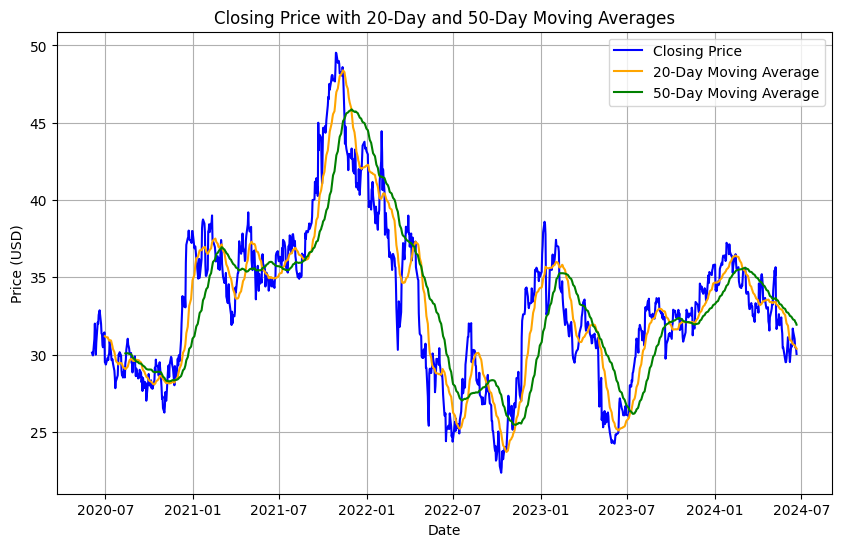

In [17]:
plt.figure(figsize=(10,6))
plt.plot(wmg_data['close'], label='Closing Price', color='blue')
plt.plot(wmg_data['20_day_MA'], label='20-Day Moving Average', color='orange')
plt.plot(wmg_data['50_day_MA'], label='50-Day Moving Average', color='green')
plt.title('Closing Price with 20-Day and 50-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
train_size = int(len(wmg_data) * 0.8)
train_data = wmg_data['close'][:train_size]
test_data = wmg_data['close'][train_size:]

In [19]:
model = ARIMA(train_data, order=(5,1,0))
model_fit = model.fit()

/Users/ChhaviNijhawan/Library/Python/3.12/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ChhaviNijhawan/Library/Python/3.12/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ChhaviNijhawan/Library/Python/3.12/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [20]:
forecast = model_fit.forecast(steps=len(test_data))
test_data.reset_index(drop=True, inplace=True)

/Users/ChhaviNijhawan/Library/Python/3.12/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/ChhaviNijhawan/Library/Python/3.12/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [21]:
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'RMSE: {rmse}')

RMSE: 1.8780588152348485


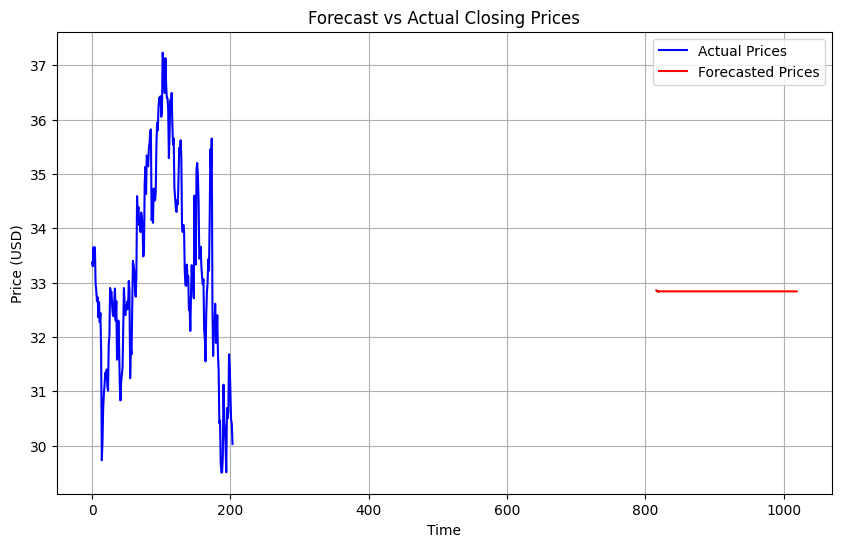

In [22]:
plt.figure(figsize=(10,6))
plt.plot(test_data, label='Actual Prices', color='blue')
plt.plot(forecast, label='Forecasted Prices', color='red')
plt.title('Forecast vs Actual Closing Prices')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
future_forecast = model_fit.forecast(steps=10)  # Predicting the next 10 days/periods
print("Future forecasted stock prices:")
print(future_forecast)

Future forecasted stock prices:
816    32.854096
817    32.840214
818    32.845345
819    32.826441
820    32.837139
821    32.838813
822    32.837797
823    32.838510
824    32.837818
825    32.837961
Name: predicted_mean, dtype: float64


/Users/ChhaviNijhawan/Library/Python/3.12/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/ChhaviNijhawan/Library/Python/3.12/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
